# <p style = "font-size : 50px; color : #099 ; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Heart Attack Data Analysis</strong></p>

## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ;  sns.set_theme()


## Load Dataset

In [7]:
heart_dataset_filepath = "C:/Users/z004fuuz/Desktop/ML/heart.csv" 
heart_dataset = pd.read_csv(heart_dataset_filepath)
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features and Meanings

- Age : age
- Sex : sex (1: male 0: female)
- CP : chest pain (from 1 to 4 chest pain types)
- CHOL : cholesterol (200–239 is normal)
- FBS : fasting blood sugar (0 or 1)(1 is diabetic)
- RESTECG : resting electrocardiographic results (0: normal 1: bad 2: very bad)
- THALACHH : maximum heart rate achieved
- EXNG (EXANG) : exercise induced angina (angina : chest pain 1: exists 0: normal)
- OLDPEAK: ST depression induced by exercise (more than 1 mm is abnormal)
- SLP (SLOPE) : slope of ST depression (1: up 2: stabil 3: down)
- CAA : number of major vessels (from 0 to 3)
- THALL : genetic blood disorder 
- OUTPUT :  0: low risk 1: high risk

#### Source : https://archive.ics.uci.edu/ml/datasets/heart%2BDisease

## Data and Feature Numbers

In [6]:
heart_dataset.shape

(303, 14)

## Delete missing values

In [7]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Data Distribution

<AxesSubplot:title={'center':'Sex Variable'}>

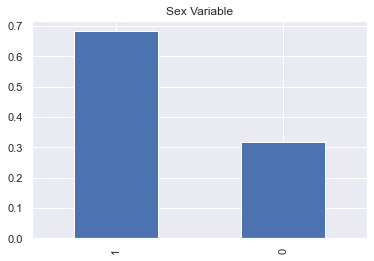

In [8]:
heart_dataset["sex"].value_counts(normalize = True).plot.bar(title = "Sex Variable")

- male number is 2x female number

<AxesSubplot:title={'center':'caa'}>

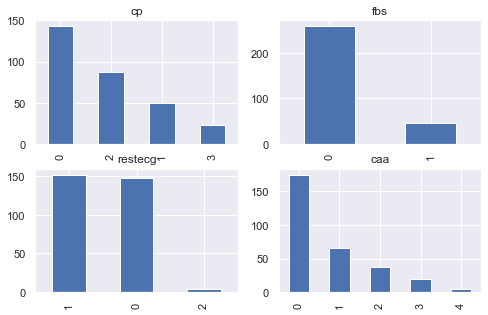

In [9]:
plt.figure(figsize=(8,5))
plt.subplot(221)
heart_dataset["cp"].value_counts().plot.bar(title="cp")
plt.subplot(222)
heart_dataset["fbs"].value_counts().plot.bar(title="fbs")
plt.subplot(223)
heart_dataset["restecg"].value_counts().plot.bar(title="restecg")
plt.subplot(224)
heart_dataset["caa"].value_counts().plot.bar(title="caa")

<AxesSubplot:title={'center':'Output Varible'}>

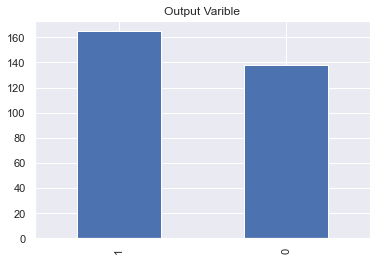

In [10]:
heart_dataset["output"].value_counts().plot.bar(title = "Output Varible")

- High and low risk outputs are close

<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

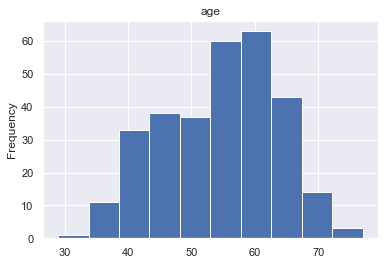

In [11]:
heart_dataset["age"].plot.hist(title="age")

## Check for Outliers

In [12]:
from scipy import stats

<AxesSubplot:xlabel='oldpeak'>

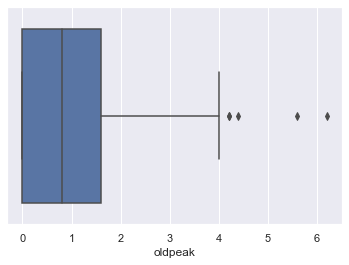

In [13]:
sns.boxplot(x=heart_dataset["oldpeak"])

<AxesSubplot:xlabel='thalachh'>

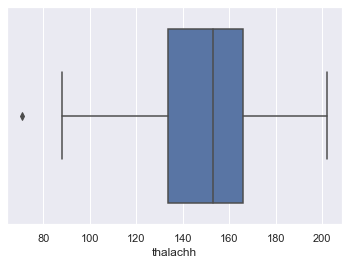

In [14]:
sns.boxplot(x=heart_dataset["thalachh"])

#### Detect Outliers

In [15]:
zscore = stats.zscore(heart_dataset)
zscore_abs = np.abs(zscore)
treshold = 3
np.where(zscore_abs>3) 

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
        251, 272, 281], dtype=int64),
 array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
       dtype=int64))

#### Delete Outliers

In [16]:
heart_dataset = heart_dataset[(zscore_abs < 3).all(axis=1)] #outliers deleted

<AxesSubplot:xlabel='oldpeak'>

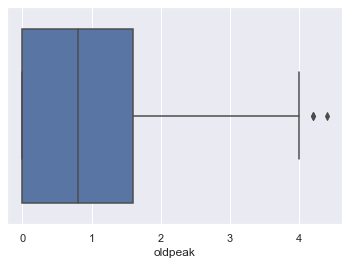

In [17]:
sns.boxplot(x=heart_dataset["oldpeak"])

<AxesSubplot:xlabel='thalachh'>

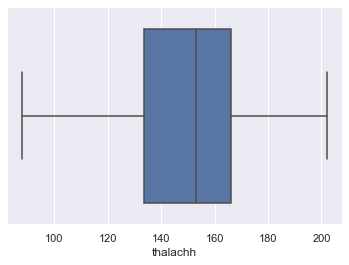

In [18]:
sns.boxplot(x=heart_dataset["thalachh"])

## Heatmap

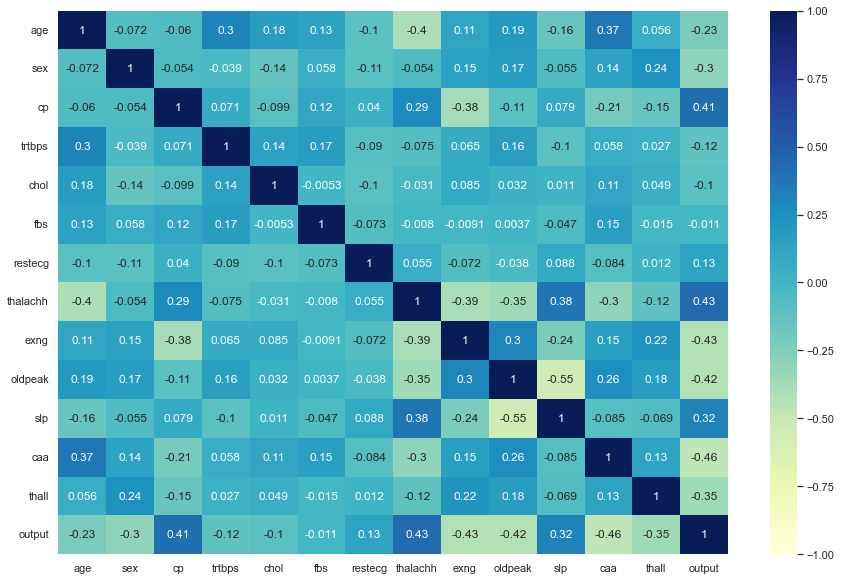

In [19]:
plt.figure(figsize=(15,10))
correlation_df = heart_dataset.corr() #gives correlation as negative or positive number
sns.heatmap(correlation_df,cmap="YlGnBu", annot = True, vmin=-1, vmax = 1)  
plt.show()

#### Result: Variables who have relationships with output -> AGE, SEX, CP, THALACHH, EXNG, OLDPEAK, CAA and THALL

## Heart Attack related with Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

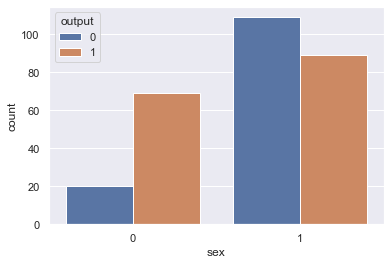

In [20]:
sns.countplot(data = heart_dataset, x = "sex", hue = "output") 
#remember 0:female 1:male

#### Result: Females (0) have more chance to get heart attack

## Heart Attack Related with Age 

<AxesSubplot:xlabel='age', ylabel='count'>

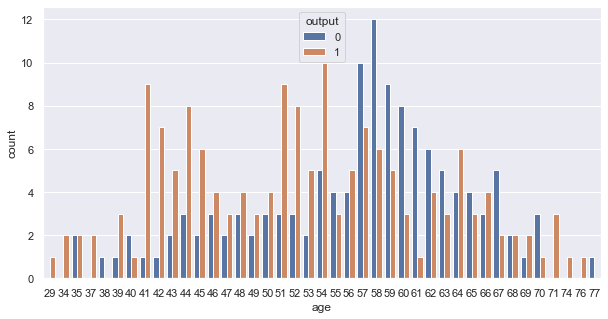

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x=heart_dataset["age"], hue=heart_dataset["output"])

#### Result: People who are younger have more chance to have heart attack.

## Heart Attack related with Chest Pain Classes

<AxesSubplot:xlabel='cp', ylabel='count'>

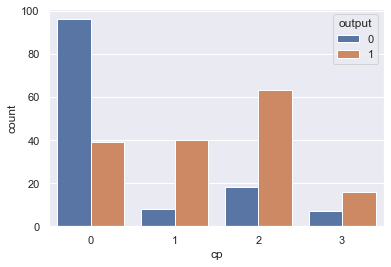

In [22]:
sns.countplot(data = heart_dataset ,x="cp", hue="output")

#### People with chest pain type 2 have higher chance to have heart attack.

## Heart Attack related with Thall

<AxesSubplot:xlabel='thall', ylabel='count'>

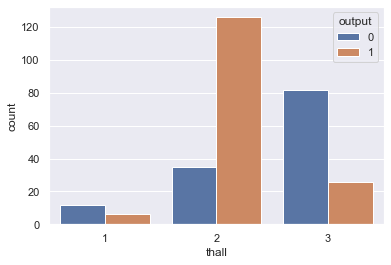

In [23]:
sns.countplot(x=heart_dataset["thall"], hue =heart_dataset["output"])

#### Result: People with thall type 2 have more chance to have heart attack.

## Heart Attack related with Exng - Exercise Induced Angina

<AxesSubplot:xlabel='exng', ylabel='count'>

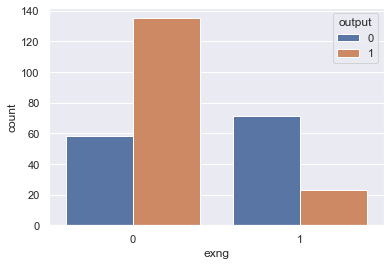

In [24]:
sns.countplot(x = heart_dataset["exng"], hue = heart_dataset["output"])

#### Result: People with exng:0 have more chance to have heart attack.

## Heart Attack relation with OldPeak

<AxesSubplot:xlabel='oldpeak', ylabel='count'>

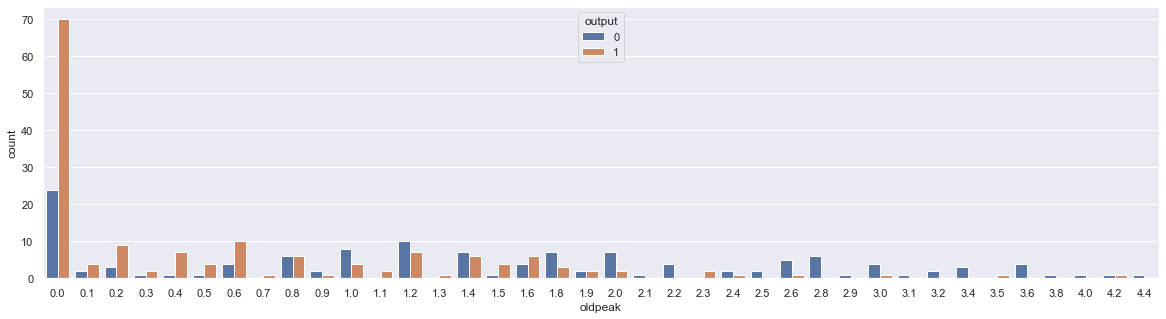

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x = heart_dataset["oldpeak"], hue = heart_dataset["output"])

#### Result: People with less oldpeak have higher chance to have heart attack.

## Heart Attack relation with Thalachh

<AxesSubplot:xlabel='thalachh', ylabel='count'>

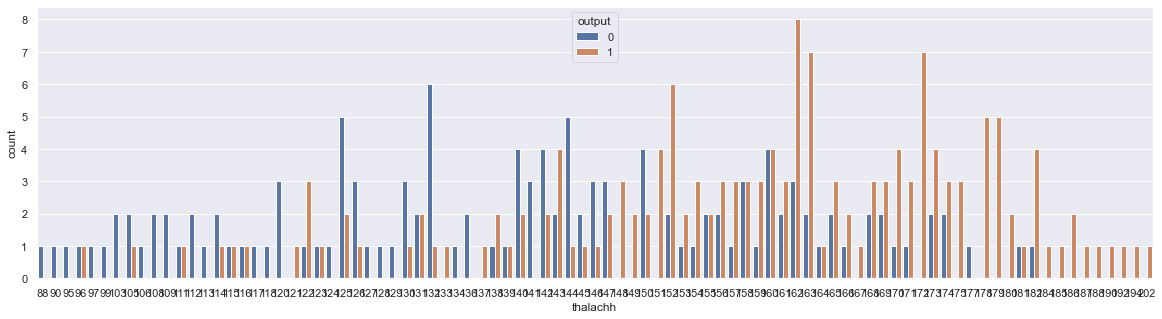

In [26]:
plt.figure(figsize = (20,5))
sns.countplot(x = heart_dataset["thalachh"], hue=heart_dataset["output"])

#### Result: People with higher thalachh have more chance to have heart attack.

## Evaluate Data Analysis

Variables who have relationships with output -> CP, THALL, EXNG, OLDPEAK, THALACHH SEX and AGE
- SEX : Females (0) have more chance to get heart attack
- AGE: People who are younger have more chance to have heart attack.
- CP : People with chest pain type 2 have higher chance to have heart attack.
- EXNG : People with exng:0 have more chance to have heart attack.
- OLDPEAK : People with less oldpeak have higher chance to have heart attack.
- THALL : People with thall type 2 have more chance to have heart attack.
- THALACHH : People with higher thalachh have more chance to have heart attack.

# <p style = "font-size : 50px; color : #099 ; font-family : 'Comic Sans MS'; text-align : center; border-radius: 5px 5px;"><strong>Heart Attack Data Prediction</strong></p>

## Prepare Data

In [8]:
from sklearn.model_selection import train_test_split
y = heart_dataset["output"]
X = heart_dataset.drop("output", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Feature Scaling

In [10]:
from sklearn import preprocessing

#### Min Max Scaling

In [11]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X_train_after_min_max_scaler = min_max_scaler.fit_transform(X_train)
X_test_after_min_max_scaler = min_max_scaler.fit_transform(X_test)

#### Standart Scaling

In [12]:
standard_scaler = preprocessing.StandardScaler()
standard_scaled_dataset = standard_scaler.fit(heart_dataset)


#### Robust Scaler

Because this scaler is robust to outliers.

In [13]:
robust_scaler = preprocessing.RobustScaler()
X_train_after_robust_scaler = robust_scaler.fit_transform(X_train)
X_test_after_robust_scaler = robust_scaler.fit_transform(X_test)


## Prepare Train and Test Datasets

Y = heart_dataset["output"]
X = heart_dataset.drop("output",axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.9, random_state = 42)
X_train.shape , y_train.shape


## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
prediction = linear_regression_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Error rate:")
print(mean_absolute_error(prediction, y_test)*100)

Error rate:
30.32538693637445


#### Result: Because linear regression have 2 dimentions and output is continues numbers, that is why it is not successfull. Linear Regression also can  not find the relationships between features.

## Logistic Regression Before Scaling

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
prediction = logistic_regression_model.predict(X_test)
print("Error rate:")
print(mean_absolute_error(prediction, y_test)*100)

Error rate:
17.24137931034483


C:\Users\z004fuuz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression After Scaling

In [42]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_after_min_max_scaler, y_train)
prediction = logistic_regression_model.predict(X_test_after_min_max_scaler)
prediction_train = logistic_regression_model.predict(X_train_after_min_max_scaler)
print("Error test rate:")
print(mean_absolute_error(prediction, y_test)*100)
print("Error train rate:")
print(mean_absolute_error(prediction_train, y_train)*100)

Error test rate:
18.96551724137931
Error train rate:
13.100436681222707


#### Result: After min max scaling, error rate is still high. 

In [43]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_after_robust_scaler, y_train)
prediction = logistic_regression_model.predict(X_test_after_robust_scaler)
prediction_train = logistic_regression_model.predict(X_train_after_robust_scaler)
print("Error test rate:")
print(mean_absolute_error(prediction, y_test)*100)
print("Error train rate:")
print(mean_absolute_error(prediction_train, y_train)*100)

Error test rate:
15.517241379310345
Error train rate:
12.663755458515283


#### Result: After robust scaling, error rate is still high. But train error < test error. I may mean overfit. Because of that I'll try ridge regression.

## Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

In [45]:
ridge = Ridge()
ridge.fit(X_train_after_robust_scaler,y_train)
ridge.alpha
prediction_ridge=ridge.predict(X_test_after_robust_scaler)
print("Error test rate:")
print(mean_absolute_error(prediction_ridge, y_test)*100)

Error test rate:
28.695548797381793


#### Nope that was not it

### Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
ridge = Lasso()
ridge.fit(X_train_after_robust_scaler,y_train)
ridge.alpha
prediction_ridge=ridge.predict(X_test_after_robust_scaler)
print("Error test rate:")
print(mean_absolute_error(prediction_ridge, y_test)*100)

Error test rate:
49.232043366962806


#### Nope that was not it either

### Best Model is so far Logistic Regression with Robust Scaler

## SGDClassifier

In [60]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()

In [61]:
#Calculate Error Rate 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#numpy.ravel = returns a flattened array

y_train_pred = cross_val_predict(sgd_classifier, X_train_after_robust_scaler, y_train, cv=3)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
tn, fp, fn, tp

(84, 22, 29, 94)

In [62]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate , (1-positive_rate)*100 #train prediction error

(0.8103448275862069, 0.7433628318584071, 18.965517241379317)

In [63]:
y_test_pred = cross_val_predict(sgd_classifier, X_test_after_robust_scaler, y_test, cv=3)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tn, fp, fn, tp


(14, 9, 3, 32)

In [64]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate , (1-positive_rate)*100 #test prediction error

(0.7804878048780488, 0.8235294117647058, 21.95121951219512)

## KNNClassification

In [65]:

from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}] 

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3) #cv = cross validation number
                                                                 #verbose = to make code tell what it is doing
                                                                 #1: computation time
                                                                 #2: computation time + score
                                                                 #3: all information
                                                                 #uniform: equal weights
                                                                 #distance: weight by distance
                                                                 #give parameter options so that grid search can select the best
grid_search.fit(X_train_after_robust_scaler, y_train) #6 candidate = 2 diff weights x 3 diff neighbors number

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.804 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.804 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.783 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.783 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.778 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.804 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.804 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.783 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.783 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.778 total time=   0.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.783 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [67]:
(1-grid_search.best_score_ )*100

18.357487922705307

## Support Vector Machine

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [82]:
svm_clf = LinearSVC()
svm_clf.fit(X_train_after_robust_scaler, y_train)
y_train_pred = cross_val_predict(svm_clf, X_train_after_robust_scaler, y_train, cv=3)
y_test_pred = cross_val_predict(svm_clf, X_test_after_robust_scaler, y_test, cv=3)

In [86]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
tn, fp, fn, tp

(84, 22, 12, 111)

In [87]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate , (1-positive_rate)*100 #train prediction error

(0.8345864661654135, 0.875, 16.541353383458645)

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tn, fp, fn, tp

(14, 9, 4, 31)

In [89]:
positive_rate = tp / (tp + fp)
negative_rate = tn / (tn + fn)
positive_rate, negative_rate , (1-positive_rate)*100 #test prediction error

(0.775, 0.7777777777777778, 22.499999999999996)

## Desicion Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_after_robust_scaler, y_train)


DecisionTreeClassifier()

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_clf, X_train_after_robust_scaler, y_train, cv=3)

array([0.66666667, 0.71604938, 0.75      ])